In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Key Concepts and Challenges:**

-**Data Collection:** Obtain a dataset with numerical features and a target variable for
prediction.

-**Data Exploration and Cleaning:** Explore the dataset to understand its structure, handle
missing values, and ensure data quality.

-**Feature Selection:** Identify relevant features that may contribute to the predictive model.

-**Model Training:** Implement linear regression using a machine learning library (e.g., Scikit-
Learn).

-**Model Evaluation:** Evaluate the model's performance on a separate test dataset using
metrics such as Mean Squared Error or R-squared.

-**Visualization:** Create visualizations to illustrate the relationship between the predicted and
actual values.


### DataSet Loading

In [3]:
df=pd.read_csv(r"C:\Users\hp\Downloads\jupyter\Housing.csv")

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


No null Values are present for now.

In [6]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## <font color='Brown'>Detecting Outliers</font>

In [8]:
lower_quant=df['price'].quantile(0.25)
high_quant=df['price'].quantile(0.75)
IQR=high_quant-lower_quant
print(IQR)
lower_bound=lower_quant-(1.5*IQR)
upper_bound=high_quant+(1.5*IQR)
print(lower_bound, upper_bound)

2310000.0
-35000.0 9205000.0


In [9]:
out=df[(df['price']<lower_bound) | (df['price']>upper_bound)]

In [10]:
out

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


There are about 14 Outliers present.

In [11]:
lower_quant=df['area'].quantile(0.25)
high_quant=df['area'].quantile(0.75)
IQR=high_quant-lower_quant
print(IQR)
lower_bound=lower_quant-(1.5*IQR)
upper_bound=high_quant+(1.5*IQR)
print(lower_bound, upper_bound)

2760.0
-540.0 10500.0


In [12]:
df[(df['area']<lower_bound) | (df['area']>upper_bound)]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished
64,7000000,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
69,6790000,12090,4,2,2,yes,no,no,no,no,2,yes,furnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
129,5873000,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished
186,5110000,11410,2,1,2,yes,no,no,no,no,0,yes,furnished
191,5040000,10700,3,1,2,yes,yes,yes,no,no,0,no,semi-furnished


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


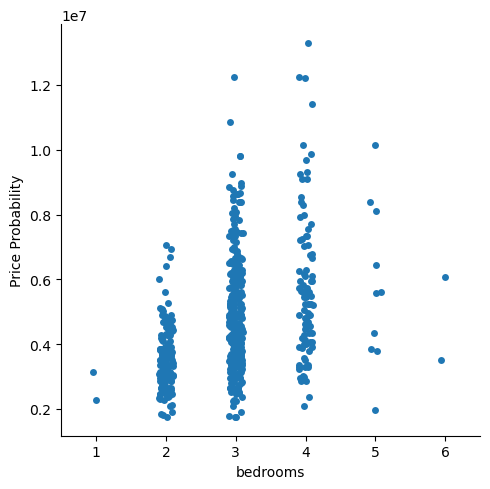

In [13]:
sns.catplot(x='bedrooms', y='price', data=df).set_ylabels('Price Probability')

In [14]:
from scipy.stats import skew

In [15]:
skewness=skew(df['price'])

In [16]:
skewness

1.2088998457878217

In [57]:
# which means that data is highly skewed

<Axes: >

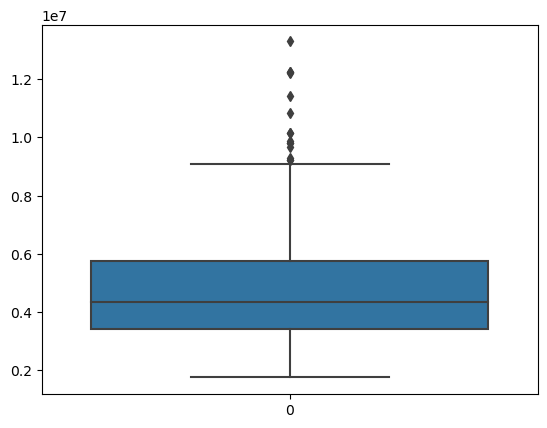

In [17]:
sns.boxplot(df['price'])

<Axes: >

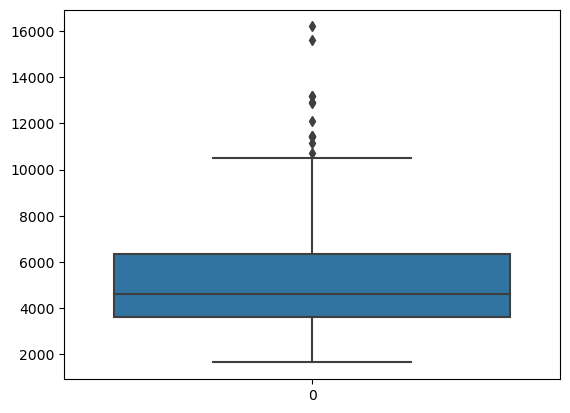

In [18]:
sns.boxplot(df['area'])

<Axes: >

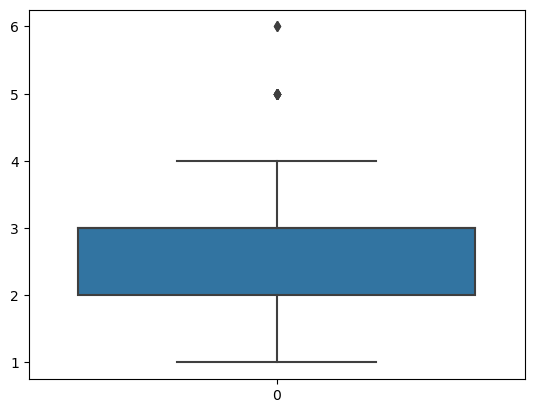

In [28]:
sns.boxplot(df['bedrooms'])

### Dropping the outliers

In [19]:
df=df[(df['price']>lower_bound) | (df['price']<upper_bound)]

In [20]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [21]:
df.shape

(545, 13)

## <font color='Green'>Analysing various parameters wrt to Price and Area</font>

<Axes: xlabel='area', ylabel='price'>

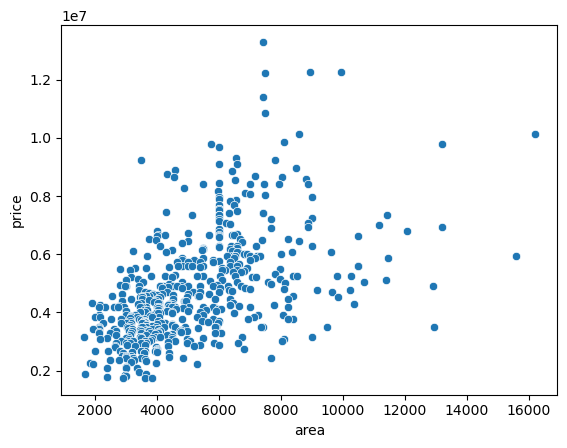

In [22]:
sns.scatterplot(data=df, x='area', y='price')

<Axes: xlabel='area', ylabel='price'>

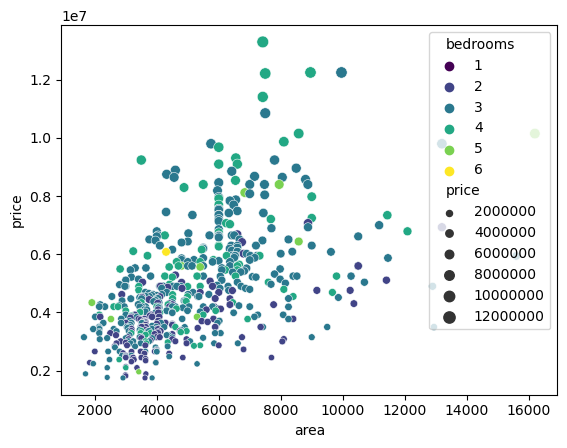

In [23]:
sns.scatterplot(data=df, x='area', y='price', hue='bedrooms', palette='viridis', size='price')

***Most people are prefering 2 and 3 bedrooms and as the area increases price also increases.***

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


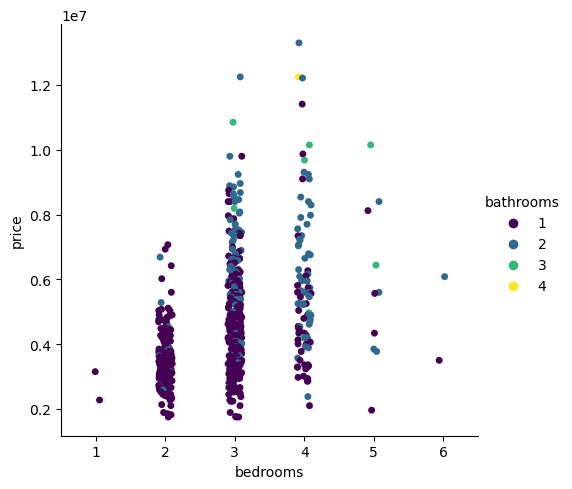

In [24]:
sns.catplot(data=df, x='bedrooms', y='price', hue='bathrooms', palette='viridis')

In [25]:
df[df['bedrooms']==6]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
112,6083000,4300,6,2,2,yes,no,no,no,no,0,no,furnished
395,3500000,3600,6,1,2,yes,no,no,no,no,1,no,unfurnished


<Axes: xlabel='area', ylabel='price'>

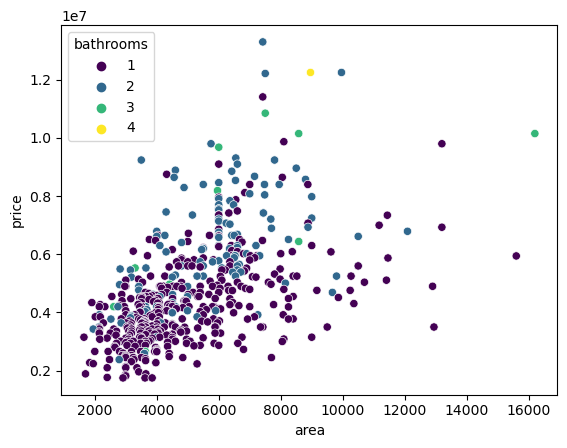

In [26]:
sns.scatterplot(data=df, x='area', y='price', hue='bathrooms', palette='viridis')

***From this graph people having 1 bathroom with lesser area are paying less but the people having only 1 bathroom with the greater area are paying more. Same principle is applied to the 2 bathrooms case and the following.***

In [27]:
df[df['bathrooms']==4]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


<Axes: xlabel='area', ylabel='price'>

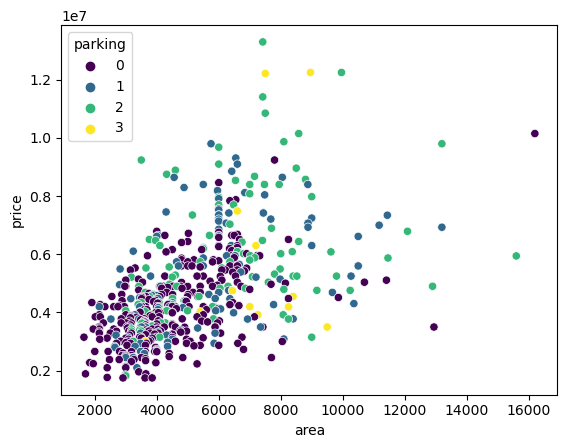

In [28]:
sns.scatterplot(data=df, x='area', y='price', hue='parking', palette='viridis')

***From this graph we can only conclude that most of the people prefer 0 parking. Parking is not directly helping in predicting the price.***

<Axes: xlabel='area', ylabel='price'>

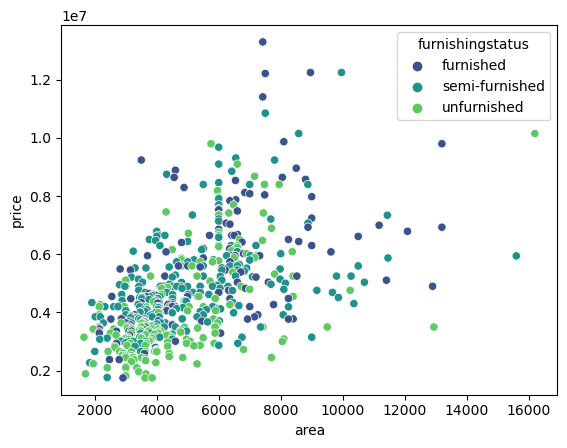

In [29]:
sns.scatterplot(data=df, x='area', y='price', hue='furnishingstatus', palette='viridis')

***Price of fully furnished but less area prices are less and then as the area increases prices of the furnished houses increases.***
***Same principle is applied to the semi-furnished houses and then to the unfurnished houses.***

<Axes: xlabel='area', ylabel='price'>

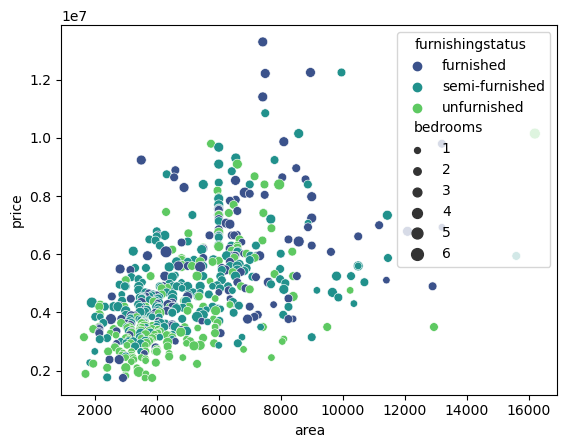

In [30]:
sns.scatterplot(data=df, x='area', y='price', hue='furnishingstatus', palette='viridis', size='bedrooms')

<Axes: xlabel='bedrooms', ylabel='count'>

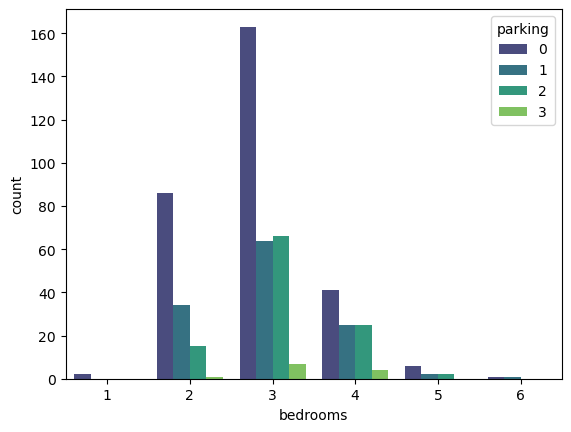

In [31]:
sns.countplot(data=df, x='bedrooms', hue='parking', palette='viridis')

***Most of the people prefer 3 bedrooms with 0 as the parking followed by 2 bedrooms with 0 as the parking.***

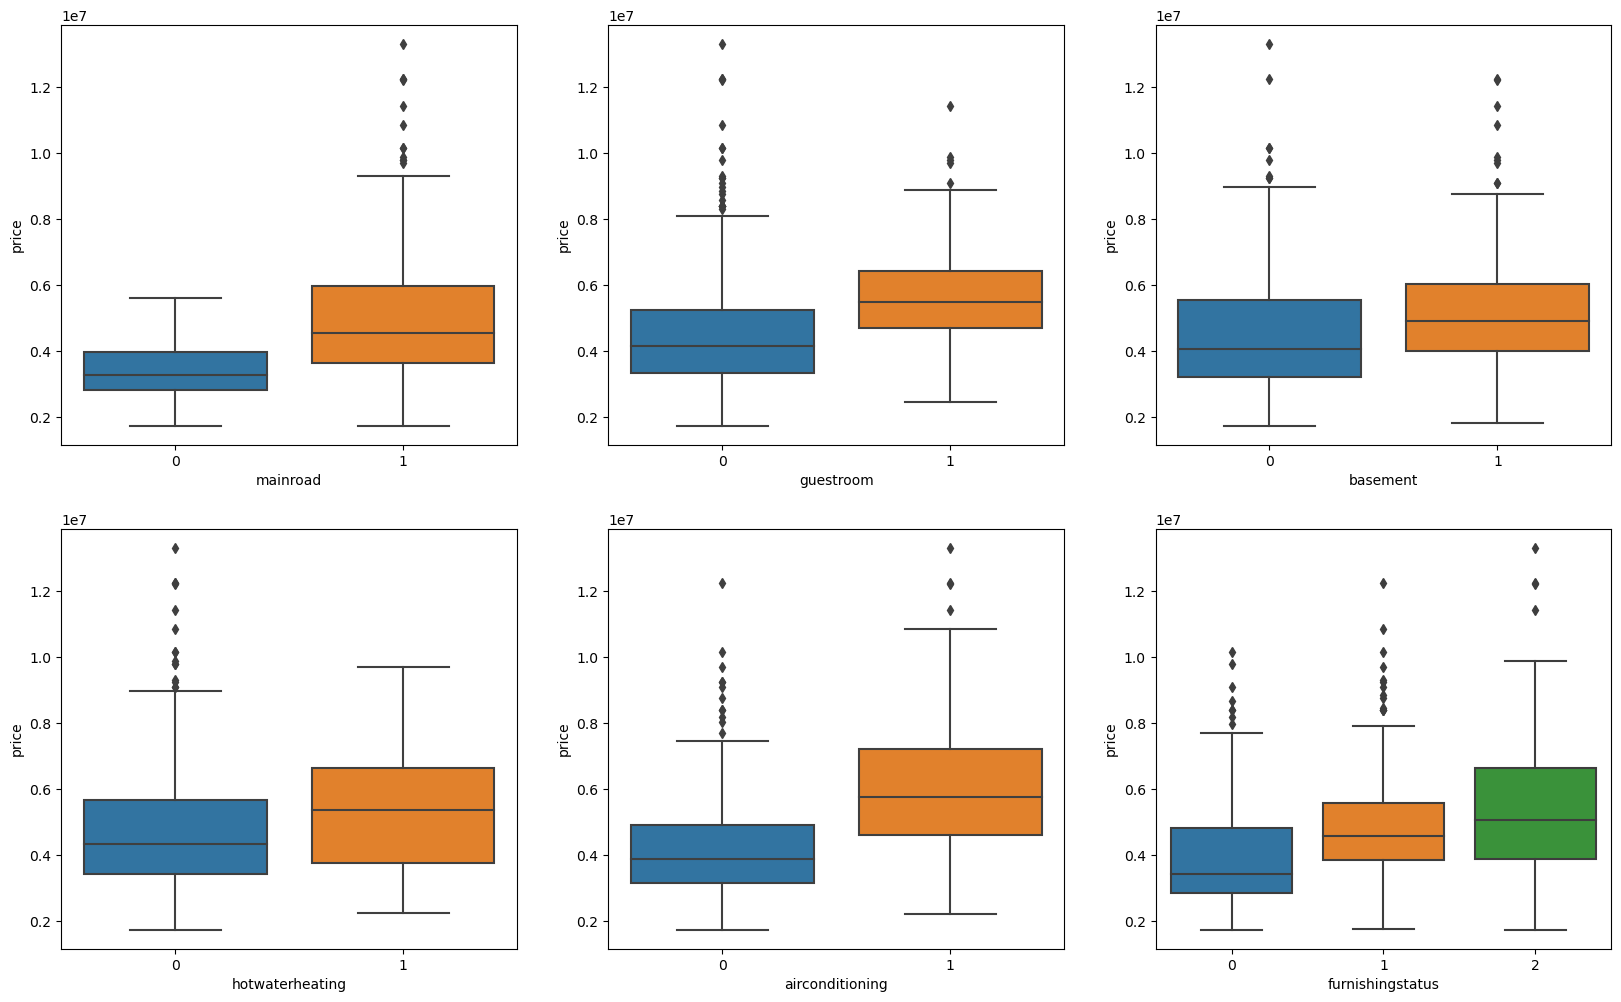

In [370]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = df)
plt.show()

<Axes: xlabel='prefarea', ylabel='count'>

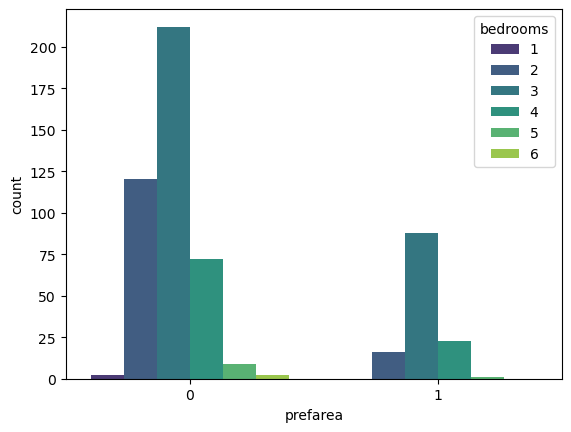

In [371]:
sns.countplot(data=df, x='prefarea', hue='bedrooms', palette='viridis')

<Axes: xlabel='prefarea', ylabel='area'>

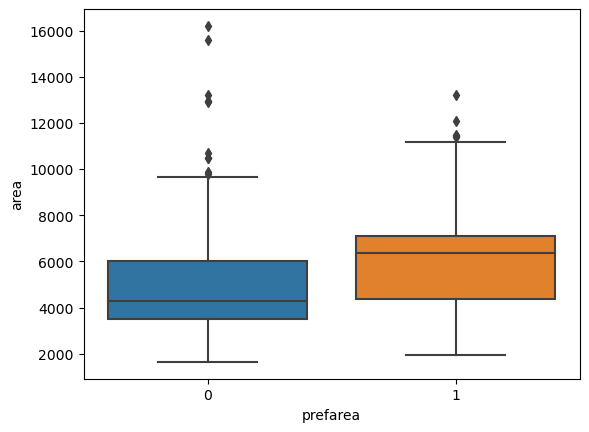

In [372]:
sns.boxplot(x='prefarea', y='area', data=df)

In [32]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [33]:
mapping ={'yes':1, 'no':0}
col=['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning']
for col in df:
    df[col]=[mapping.get(value, value) for value in df[col]]

In [34]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [36]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [39]:
mapping ={'unfurnished':0, 'semi-furnished':1, 'furnished':2}
col=['furnishingstatus']
for col in df:
    df[col]=[mapping.get(value, value) for value in df[col]]

In [40]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


<Axes: >

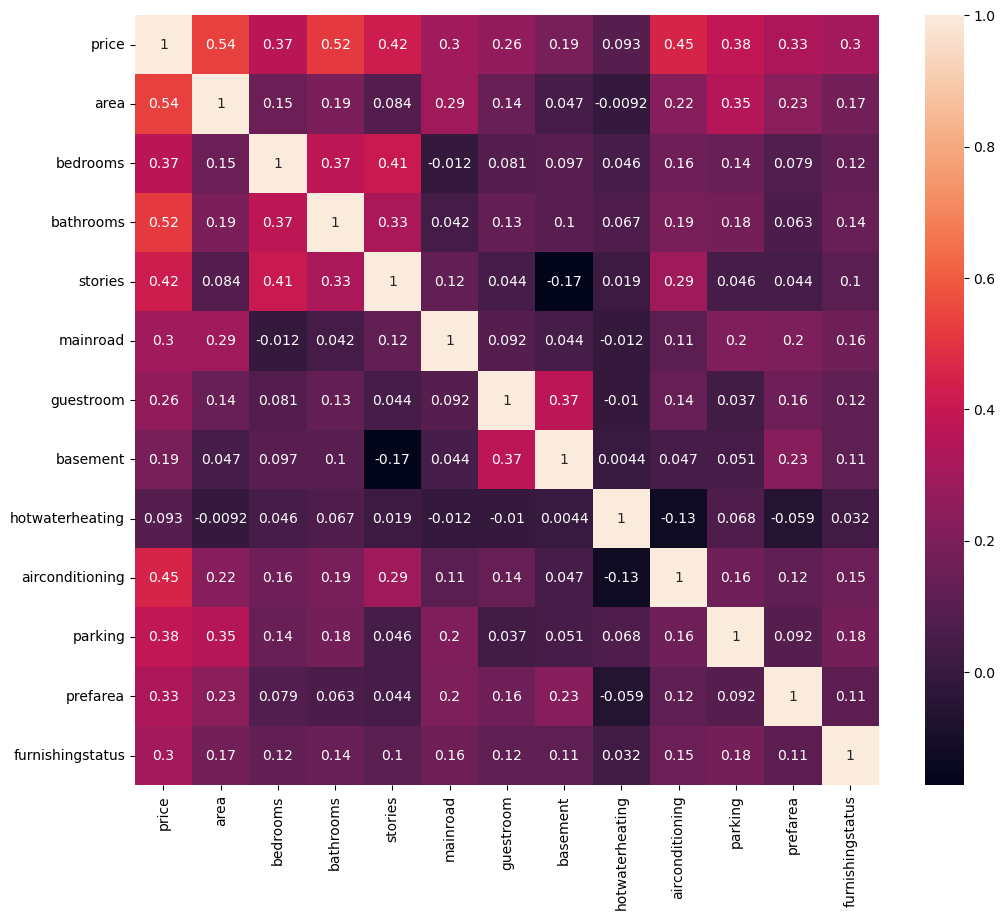

In [42]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

### Scaling the Features

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
x_1=df.iloc[:,1:]

In [53]:
x_1

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0,2


In [54]:
y_1=df.iloc[:,0]

In [55]:
y_1

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [57]:
x_1=MinMaxScaler().fit_transform(x_1)

In [59]:
pd.DataFrame(x_1)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,1.0
1,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,1.0
2,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,1.0
4,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0.0
541,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5
542,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
543,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0


##### To classify the most important features we can also go for the ExtraTreeClassifier rather than the heatmap.

### <font color='Orange'>Using ExtraTreesClassifier</font>

In [45]:
from sklearn.ensemble import ExtraTreesClassifier

In [60]:
model=ExtraTreesClassifier()

In [62]:
model.fit(x_1,y_1)

ExtraTreesClassifier()

In [64]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [65]:
col=['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']
feature_imp=pd.Series(model.feature_importances_, index=col)
feature_imp

area                0.391997
bedrooms            0.101780
bathrooms           0.050627
stories             0.096197
mainroad            0.021341
guestroom           0.028743
basement            0.037842
hotwaterheating     0.019962
airconditioning     0.036832
parking             0.107580
prefarea            0.030334
furnishingstatus    0.076766
dtype: float64

<Axes: >

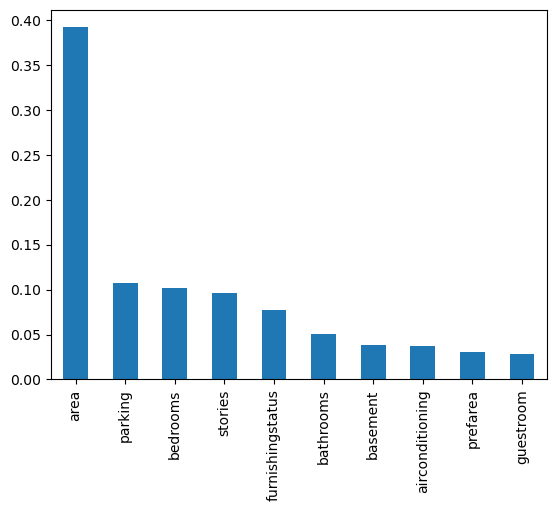

In [66]:
feature_imp.nlargest(10).plot(kind='bar')

##### Hence we can conclude that the guestroom, basement and hotwaterheating are least important as there it has such less score and also afetr looking the heatmap these 3 features are less correlated with the price field as well.

### <font color='Brown'>Model Training</font>

In [339]:
from sklearn.model_selection import train_test_split

In [340]:
df1=df.copy()

In [341]:
df1=df1.drop(columns={'hotwaterheating', 'guestroom', 'basement'}, axis=1)

In [342]:
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,1,2,1,2
1,12250000,8960,4,4,4,1,1,3,0,2
2,12250000,9960,3,2,2,1,0,2,1,1
3,12215000,7500,4,2,2,1,1,3,1,2
4,11410000,7420,4,1,2,1,1,2,0,2


In [308]:
x=df1.iloc[:,1:]

In [343]:
x

,area,bedrooms,bathrooms,stories,basement,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,0,1,2,1,2
1,8960,4,4,4,0,1,3,0,2
2,9960,3,2,2,1,0,2,1,1
3,7500,4,2,2,1,1,3,1,2
4,7420,4,1,2,1,1,2,0,2
...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,2,0,0
541,2400,3,1,1,0,0,0,0,1
542,3620,2,1,1,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,2


In [344]:
y=df1.iloc[:,0]

In [345]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [346]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.20, random_state=42)

In [347]:
x_train.shape

(436, 9)

In [348]:
x_test.shape

(109, 9)

In [349]:
y_train.shape

(436,)

In [350]:
y_test.shape

(109,)

### Scaling the Values

In [317]:
from sklearn.preprocessing import StandardScaler

In [351]:
scaler=StandardScaler()

In [352]:
y_train=np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

In [353]:
scaled_x_train=scaler.fit_transform(x_train)
scaled_y_train=scaler.fit_transform(y_train)

In [354]:
scaled_x_test=scaler.fit_transform(x_test)
scaled_y_test=scaler.fit_transform(y_test)

In [355]:
from sklearn.linear_model import LinearRegression

In [356]:
lr_model=LinearRegression()

In [357]:
lr_model.fit(scaled_x_train, scaled_y_train)

LinearRegression()

#### Coefficient Value

In [358]:
coef=lr_model.coef_
coef

array([[0.31927147, 0.02397089, 0.29895183, 0.21945389, 0.13262328,
        0.19498662, 0.12111462, 0.16213599, 0.10097668]])

#### Intercept Value

In [359]:
lr_model.intercept_

array([-1.97301447e-16])

### Predicting the Prices (for x_test values)

In [360]:
predictions=lr_model.predict(scaled_x_test)

In [361]:
predictions=predictions.reshape(-1)
predictions

array([ 0.38685812,  1.31475599, -1.02341727, -0.18433339, -0.87442225,
       -0.69432596,  0.52576338,  0.7418932 , -1.14001887, -1.07278876,
        2.57779226, -1.16731566, -0.79183031, -0.60858261, -0.59882568,
        0.08539895, -1.10019008, -0.01755426, -0.16629444, -0.71484715,
        0.56082368,  0.52307697, -1.21218428, -0.10859884,  0.36747654,
        1.63586078, -1.01613869,  0.013786  ,  2.1714311 , -0.81554592,
        0.83362025, -0.88013959,  0.85560436, -0.33925407, -0.72176326,
        0.4001505 , -0.09207844, -0.27964286, -0.7952351 , -0.26941913,
       -0.09563742, -0.80599935,  1.30216129, -0.45569033, -0.59677184,
       -0.31443046,  0.97278596, -0.47925059, -0.5193184 , -0.75719611,
        1.35090193, -1.17780297, -0.17242321,  0.02100079, -0.61639951,
       -1.03972768,  1.32320768, -1.13004769, -0.33085133, -1.18841178,
       -0.09074605, -0.66086606,  0.17326729, -0.31256143, -0.01049745,
       -0.51561578,  1.41538695, -0.7515364 ,  0.74738551,  0.74

In [362]:
scaled_y_test=scaled_y_test.reshape(-1)

In [363]:
residuals=scaled_y_test-predictions

In [364]:
residuals

array([-0.80831575, -0.58419991,  0.44628211,  0.82148295, -0.10747448,
        0.6464944 , -0.41791741, -0.94851584,  0.00244461,  0.33686253,
       -0.29046091,  0.12314792,  0.05901763, -0.12423007, -0.61658734,
       -1.12956669,  0.05602234,  1.05946539, -0.75333128, -0.23591408,
        0.20086791, -0.33739224, -0.17447402,  0.21644481, -0.72977671,
        1.58553574,  0.15878398,  0.03178896, -0.03977728, -0.29089283,
       -0.04079317,  0.20959792, -0.12504828, -0.58037165, -0.02661718,
       -0.75933711,  0.04424688, -0.48430534,  0.12469343, -0.89929063,
        0.31245766,  0.21329644, -0.57160521,  0.41097231, -0.22944736,
        0.07978586, -0.27336539,  0.8050451 , -0.37228537, -0.6605977 ,
        0.15804179,  0.04022871, -0.15562791, -0.46581005, -0.17245709,
       -0.40920164,  0.80844614, -0.16320409,  0.03393573,  0.31548932,
       -0.42411809, -0.00967561, -0.28648342, -0.54479328, -0.19301164,
        1.18390084, -0.66926312,  0.79711136, -0.9508946 , -0.01

Text(0.5, 0, 'Predictions')

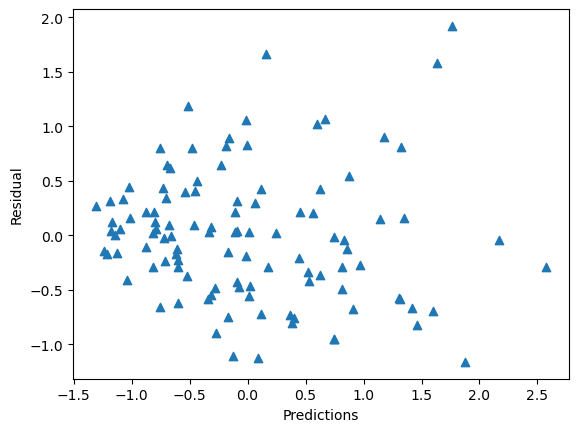

In [365]:
plt.scatter(predictions, residuals, marker='^')
plt.ylabel('Residual')
plt.xlabel('Predictions')

Since we can see that the graph is whole scattered and not following a certain rule or a trend between the two parameters which means that the Model has been correctly Trained and is neither underfitted or overfitted.

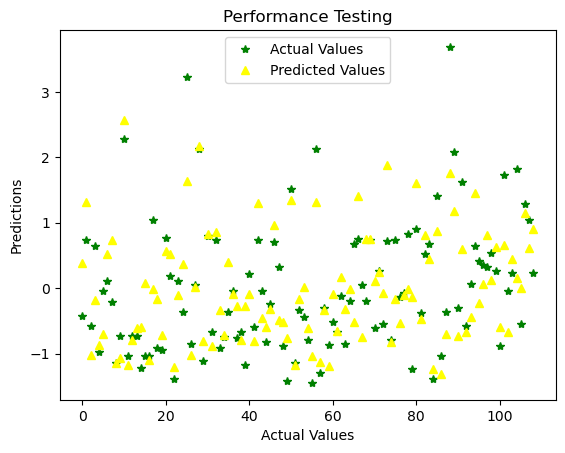

In [366]:
plt.plot(scaled_y_test, '*', label='Actual Values',color='Green')
plt.plot(predictions,'^', label='Predicted Values', color='yellow')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Performance Testing')
plt.legend()
plt.show()

### Mean Squared Error

In [367]:
from sklearn.metrics import mean_squared_error

In [368]:
mean_squared_error(scaled_y_test, predictions)

0.356557888995855

***Hence the Error we are getting between the Actual and Predicted values is 0.356557 (which is quite less and hence the model has been trained rightously).***

## --END OF PROJECT--